# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** [Dina Prastuti]
- **Email:** [Input Email]
- **ID Dicoding:** [Input Username]

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh musim terhadap jumlah sewa sepeda (cnt)?
- Apakah hari libur atau hari kerja memengaruhi jumlah sewa sepeda?

## Import Semua Packages/Library yang Digunakan

In [539]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Data Wrangling

### Gathering Data

In [540]:
day_df = pd.read_csv("data/day.csv")   # Data harian
day_df.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [541]:
hour_df = pd.read_csv("data/hour.csv")   # Data per jam
hour_df.head()

instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1

**Insight:**
- Pada tahap ini, dua dataset utama dimuat: day.csv (harian) dan hour.csv (per jam), yang memuat informasi tentang penyewaan sepeda, kondisi cuaca, musim, hari kerja, jam, serta jumlah penyewaan. Dataset ini digunakan untuk melakukan analisis lebih lanjut terkait faktor yang mempengaruhi pola penyewaan sepeda.
- Data yang ada mencakup atribut yang cukup lengkap untuk menganalisis pola penyewaan sepeda, dengan informasi tentang cuaca, musim, hari kerja, hari libur, serta waktu dalam sehari.

### Assessing Data

**Menilai tabel day_df**

In [542]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Insight:**
Secara umum, data terlihat tampak baik akan tetapi ada beberapa hal yang perlu diperhatikan:
- Kolom dteday: untuk mempermudah analisis tipe data dteday sebaiknya diubah menjadi datetime.
- Kolom yr: Akan lebih baik menggunakan tipe data kategorikal (0: 2011 atau 1: 2012).
- manth, season, holiday, weekday, workingday, weathersit: karena hanya memiliki beberapa kategori, lebih baik mengonversi kolom-kolom ini menjadi category daripada int64 untuk efisiensi memori dan performa yang lebih baik.
- Kolom casual, registered, dan cnt: Pastikan nilai cnt sesuai dengan penjumlahan casual dan registered.

In [543]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Insight:**
Tidak ada yang salah dengan data tersebut, karena semua kolom memiliki jumlah nilai yang tidak kosong (NaN) sebesar 0, yang berarti semua kolom terisi dengan data yang valid.

In [544]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())
day_df.describe()

Jumlah duplikasi:  0


instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0.190486   
std      0.465233    0.544894    0.183051    0.162961    0.142429    0.077498   
min      0.000000    1.000000    0.059130    0.079070    0.000000    0.022392   
25%      0.000000    1.000000    0.337083    0.337842    0.520000    0.134950   
50%      1.000000    1.000000    0.498333    0.486733    0.626667    0.180975   
75%      1.000000    2.000000    0.655417    0.608602    0.730209    0.233214   
max      1.000000    3.000000    0.861667    0.840896    0.972500    0.507463   

            casual   registered          cnt  
count   731.000000   731.000000   731.000000  
mean    848.176471  3656.172367  4504.348837  
std     686.622488  1560.256377  1937.211452  
min       2.000000    20.000000    22.000000  
25%     315.500000  2497.000000  3152.000000  
50%     713.000000  3662.000000  4548.000000  
75%    1096.000000  4776.500000  5956.000000  
max    3410.000000  6946.000000  8714.000000

**Insight:**
Tidak Terdapat duplikasi

In [545]:
# Menambahkan kolom baru yang merupakan hasil penjumlahan casual dan registered
day_df['calculated_cnt'] = day_df['casual'] + day_df['registered']

# Memeriksa apakah nilai calculated_cnt sama dengan cnt
comparison = day_df['cnt'] == day_df['calculated_cnt']

# Menampilkan hasil perbandingan
print(comparison.value_counts())  # Jika True semua, berarti penjumlahan benar

# Melihat data yang tidak sesuai jika ada
incorrect_rows = day_df[~comparison]
print(incorrect_rows)

True    731
Name: count, dtype: int64
Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt, calculated_cnt]
Index: []


**Insight:**
- Data tidak memiliki masalah terkait penjumlahan antara casual + registered dengan cnt di day_df.
- Sehingga bisa lanjut ke tahap analisis berikutnya karena data untuk kolom cnt sudah valid.

**Menilai tabel hour_df**

In [546]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Insight:**
Secara umum, data terlihat tampak baik akan tetapi ada beberapa hal yang perlu diperhatikan:
- Kolom dteday: untuk mempermudah analisis tipe data dteday sebaiknya diubah menjadi datetime.
- Kolom yr: Akan lebih baik menggunakan tipe data kategorikal (0: 2011 atau 1: 2012).
- manth, season, holiday, weekday, workingday, weathersit: karena hanya memiliki beberapa kategori, lebih baik mengonversi kolom-kolom ini menjadi category daripada int64 untuk efisiensi memori dan performa yang lebih baik.
- Kolom casual, registered, dan cnt: Pastikan nilai cnt sesuai dengan penjumlahan casual dan registered.

In [547]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Insight:**
Tidak ada yang salah dengan data tersebut, karena semua kolom memiliki jumlah nilai yang tidak kosong (NaN) sebesar 0, yang berarti semua kolom terisi dengan data yang valid.

In [548]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())
hour_df.describe()

Jumlah duplikasi:  0


instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std        0.167165      2.005771      0.465431      0.639357      0.192556   
min        0.000000      0.000000      0.000000      1.000000      0.020000   
25%        0.000000      1.000000      0.000000      1.000000      0.340000   
50%        0.000000      3.000000      1.000000      1.000000      0.500000   
75%        0.000000      5.000000      1.000000      2.000000      0.660000   
max        1.000000      6.000000      1.000000      4.000000      1.000000   

              atemp           hum     windspeed        casual    registered  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.475775      0.627229      0.190098     35.676218    153.786869   
std        0.171850      0.192930      0.122340     49.305030    151.357286   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.333300      0.480000      0.104500      4.000000     34.000000   
50%        0.484800      0.630000      0.194000     17.000000    115.000000   
75%        0.621200      0.780000      0.253700     48.000000    220.000000   
max        1.000000      1.000000      0.850700    367.000000    886.000000   

                cnt  
count  17379.000000  
mean     189.463088  
std      181.387599  
min        1.000000  
25%       40.000000  
50%      142.000000  
75%      281.000000  
max      977.000000

**Insight:**
Tidak Terdapat duplikasi

In [549]:
# Menambahkan kolom baru yang merupakan hasil penjumlahan casual dan registered
hour_df['calculated_cnt'] = hour_df['casual'] + hour_df['registered']

# Memeriksa apakah nilai calculated_cnt sama dengan cnt
comparison = hour_df['cnt'] == hour_df['calculated_cnt']

# Menampilkan hasil perbandingan
print(comparison.value_counts())  # Jika True semua, berarti penjumlahan benar

# Melihat data yang tidak sesuai jika ada
incorrect_rows = hour_df[~comparison]
print(incorrect_rows)

True    17379
Name: count, dtype: int64
Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, hr, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt, calculated_cnt]
Index: []


**Insight:**
- Data tidak memiliki masalah terkait penjumlahan antara casual + registered dengan cnt di day_df.
- Sehingga bisa lanjut ke tahap analisis berikutnya karena data untuk kolom cnt sudah valid.

### Cleaning Data

**Membersihkan tabel day_df**

In [550]:
# Mengubah tipe data kolom 'dteday' menjadi datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

# Cek tipe data kolom setelah perubahan
print(day_df.dtypes)

instant                    int64
dteday            datetime64[ns]
season                     int64
yr                         int64
mnth                       int64
holiday                    int64
weekday                    int64
workingday                 int64
weathersit                 int64
temp                     float64
atemp                    float64
hum                      float64
windspeed                float64
casual                     int64
registered                 int64
cnt                        int64
calculated_cnt             int64
dtype: object


In [551]:
# Mengubah kolom menjadi tipe kategorikal
day_df['yr'] = day_df['yr'].astype('category')
day_df['mnth'] = day_df['mnth'].astype('category')
day_df['season'] = day_df['season'].astype('category')
day_df['holiday'] = day_df['holiday'].astype('category')
day_df['weekday'] = day_df['weekday'].astype('category')
day_df['workingday'] = day_df['workingday'].astype('category')
day_df['weathersit'] = day_df['weathersit'].astype('category')

# Cek tipe data setelah perubahan
print(day_df.dtypes)

instant                    int64
dteday            datetime64[ns]
season                  category
yr                      category
mnth                    category
holiday                 category
weekday                 category
workingday              category
weathersit              category
temp                     float64
atemp                    float64
hum                      float64
windspeed                float64
casual                     int64
registered                 int64
cnt                        int64
calculated_cnt             int64
dtype: object


**Insight:**
Berdasarkan hasil identifikasi masalah data di tahap Assesing Data pada data day_df,
- Kolom yr: Akan lebih baik menggunakan tipe data kategorikal (0: 2011 atau 1: 2012).
- Season, holiday, weekday, workingday, weathersit: karena hanya memiliki beberapa kategori, lebih baik mengonversi kolom-kolom ini menjadi category daripada int64 untuk efisiensi memori dan performa yang lebih baik.

In [552]:
day_df.head()

instant     dteday season yr mnth holiday weekday workingday weathersit  \
0        1 2011-01-01      1  0    1       0       6          0          2   
1        2 2011-01-02      1  0    1       0       0          0          2   
2        3 2011-01-03      1  0    1       0       1          1          1   
3        4 2011-01-04      1  0    1       0       2          1          1   
4        5 2011-01-05      1  0    1       0       3          1          1   

       temp     atemp       hum  windspeed  casual  registered   cnt  \
0  0.344167  0.363625  0.805833   0.160446     331         654   985   
1  0.363478  0.353739  0.696087   0.248539     131         670   801   
2  0.196364  0.189405  0.437273   0.248309     120        1229  1349   
3  0.200000  0.212122  0.590435   0.160296     108        1454  1562   
4  0.226957  0.229270  0.436957   0.186900      82        1518  1600   

   calculated_cnt  
0             985  
1             801  
2            1349  
3            1562  
4            1600

**Membersihkan tabel hour_df**

In [553]:
# Mengubah tipe data kolom 'dteday' menjadi datetime
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

# Cek tipe data kolom setelah perubahan
print(hour_df.dtypes)

instant                    int64
dteday            datetime64[ns]
season                     int64
yr                         int64
mnth                       int64
hr                         int64
holiday                    int64
weekday                    int64
workingday                 int64
weathersit                 int64
temp                     float64
atemp                    float64
hum                      float64
windspeed                float64
casual                     int64
registered                 int64
cnt                        int64
calculated_cnt             int64
dtype: object


In [554]:
# Mengubah kolom menjadi tipe kategorikal
day_df['yr'] = day_df['yr'].astype('category')
day_df['mnth'] = day_df['mnth'].astype('category')
day_df['season'] = day_df['season'].astype('category')
day_df['holiday'] = day_df['holiday'].astype('category')
day_df['weekday'] = day_df['weekday'].astype('category')
day_df['workingday'] = day_df['workingday'].astype('category')
day_df['weathersit'] = day_df['weathersit'].astype('category')

# Cek tipe data setelah perubahan
print(day_df.dtypes)

instant                    int64
dteday            datetime64[ns]
season                  category
yr                      category
mnth                    category
holiday                 category
weekday                 category
workingday              category
weathersit              category
temp                     float64
atemp                    float64
hum                      float64
windspeed                float64
casual                     int64
registered                 int64
cnt                        int64
calculated_cnt             int64
dtype: object


**Insight:**
Berdasarkan hasil identifikasi masalah data di tahap Assesing Data pada data hour_df,
- Kolom yr: Akan lebih baik menggunakan tipe data kategorikal (0: 2011 atau 1: 2012).
- Season, holiday, weekday, workingday, weathersit: karena hanya memiliki beberapa kategori, lebih baik mengonversi kolom-kolom ini menjadi category daripada int64 untuk efisiensi memori dan performa yang lebih baik.

In [555]:
hour_df.head()

instant     dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1 2011-01-01       1   0     1   0        0        6           0   
1        2 2011-01-01       1   0     1   1        0        6           0   
2        3 2011-01-01       1   0     1   2        0        6           0   
3        4 2011-01-01       1   0     1   3        0        6           0   
4        5 2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  \
0           1  0.24  0.2879  0.81        0.0       3          13   16   
1           1  0.22  0.2727  0.80        0.0       8          32   40   
2           1  0.22  0.2727  0.80        0.0       5          27   32   
3           1  0.24  0.2879  0.75        0.0       3          10   13   
4           1  0.24  0.2879  0.75        0.0       0           1    1   

   calculated_cnt  
0              16  
1              40  
2              32  
3              13  
4               1

**Menggabungkan data day_df dan hour_df**

In [556]:
# Menghitung jam yang paling sering muncul (mode) untuk setiap hari di hour_df
most_frequent_hour_per_day = hour_df.groupby('dteday')['hr'].agg(lambda x: x.mode()[0]).reset_index()

# Menampilkan hasil untuk memastikan mode sudah dihitung dengan benar
print(most_frequent_hour_per_day.head())

      dteday  hr
0 2011-01-01   0
1 2011-01-02   0
2 2011-01-03   0
3 2011-01-04   0
4 2011-01-05   0


**Insight:**
Menunjukkan jam yang paling sering muncul di setiap hari (dteday), yang mewakili jam dengan jumlah sewa sepeda terbanyak pada hari tersebut.

In [557]:
# Gabungkan jam yang paling sering muncul ke day_df berdasarkan dteday
day_df = pd.merge(day_df, most_frequent_hour_per_day, on='dteday', how='left')

# Menampilkan hasil gabungan untuk memverifikasi
print(day_df.head())

   instant     dteday season yr mnth holiday weekday workingday weathersit  \
0        1 2011-01-01      1  0    1       0       6          0          2   
1        2 2011-01-02      1  0    1       0       0          0          2   
2        3 2011-01-03      1  0    1       0       1          1          1   
3        4 2011-01-04      1  0    1       0       2          1          1   
4        5 2011-01-05      1  0    1       0       3          1          1   

       temp     atemp       hum  windspeed  casual  registered   cnt  \
0  0.344167  0.363625  0.805833   0.160446     331         654   985   
1  0.363478  0.353739  0.696087   0.248539     131         670   801   
2  0.196364  0.189405  0.437273   0.248309     120        1229  1349   
3  0.200000  0.212122  0.590435   0.160296     108        1454  1562   
4  0.226957  0.229270  0.436957   0.186900      82        1518  1600   

   calculated_cnt  hr  
0             985   0  
1             801   0  
2            1349   0  
3 

**Insight:**
Setelah penggabungan, kolom baru yang berisi jam yang paling sering muncul (hr) pada setiap hari akan ditambahkan ke dalam day_df. Hal ini memungkinkan untuk analisis lebih lanjut mengenai pola sewa sepeda berdasarkan waktu dalam satu hari.

In [558]:
# Memeriksa hasil gabungan
day_df.head()

instant     dteday season yr mnth holiday weekday workingday weathersit  \
0        1 2011-01-01      1  0    1       0       6          0          2   
1        2 2011-01-02      1  0    1       0       0          0          2   
2        3 2011-01-03      1  0    1       0       1          1          1   
3        4 2011-01-04      1  0    1       0       2          1          1   
4        5 2011-01-05      1  0    1       0       3          1          1   

       temp     atemp       hum  windspeed  casual  registered   cnt  \
0  0.344167  0.363625  0.805833   0.160446     331         654   985   
1  0.363478  0.353739  0.696087   0.248539     131         670   801   
2  0.196364  0.189405  0.437273   0.248309     120        1229  1349   
3  0.200000  0.212122  0.590435   0.160296     108        1454  1562   
4  0.226957  0.229270  0.436957   0.186900      82        1518  1600   

   calculated_cnt  hr  
0             985   0  
1             801   0  
2            1349   0  
3            1562   0  
4            1600   0

In [559]:
# Memeriksa tipe data dan nilai yang hilang
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   instant         731 non-null    int64         
 1   dteday          731 non-null    datetime64[ns]
 2   season          731 non-null    category      
 3   yr              731 non-null    category      
 4   mnth            731 non-null    category      
 5   holiday         731 non-null    category      
 6   weekday         731 non-null    category      
 7   workingday      731 non-null    category      
 8   weathersit      731 non-null    category      
 9   temp            731 non-null    float64       
 10  atemp           731 non-null    float64       
 11  hum             731 non-null    float64       
 12  windspeed       731 non-null    float64       
 13  casual          731 non-null    int64         
 14  registered      731 non-null    int64         
 15  cnt   

## Exploratory Data Analysis (EDA)

### Explore day_df

In [560]:
day_df.describe(include="all")

instant               dteday  season     yr   mnth  holiday  \
count   731.000000                  731   731.0  731.0  731.0    731.0   
unique         NaN                  NaN     4.0    2.0   12.0      2.0   
top            NaN                  NaN     3.0    1.0    1.0      0.0   
freq           NaN                  NaN   188.0  366.0   62.0    710.0   
mean    366.000000  2012-01-01 00:00:00     NaN    NaN    NaN      NaN   
min       1.000000  2011-01-01 00:00:00     NaN    NaN    NaN      NaN   
25%     183.500000  2011-07-02 12:00:00     NaN    NaN    NaN      NaN   
50%     366.000000  2012-01-01 00:00:00     NaN    NaN    NaN      NaN   
75%     548.500000  2012-07-01 12:00:00     NaN    NaN    NaN      NaN   
max     731.000000  2012-12-31 00:00:00     NaN    NaN    NaN      NaN   
std     211.165812                  NaN     NaN    NaN    NaN      NaN   

        weekday  workingday  weathersit        temp       atemp         hum  \
count     731.0       731.0       731.0  731.000000  731.000000  731.000000   
unique      7.0         2.0         3.0         NaN         NaN         NaN   
top         0.0         1.0         1.0         NaN         NaN         NaN   
freq      105.0       500.0       463.0         NaN         NaN         NaN   
mean        NaN         NaN         NaN    0.495385    0.474354    0.627894   
min         NaN         NaN         NaN    0.059130    0.079070    0.000000   
25%         NaN         NaN         NaN    0.337083    0.337842    0.520000   
50%         NaN         NaN         NaN    0.498333    0.486733    0.626667   
75%         NaN         NaN         NaN    0.655417    0.608602    0.730209   
max         NaN         NaN         NaN    0.861667    0.840896    0.972500   
std         NaN         NaN         NaN    0.183051    0.162961    0.142429   

         windspeed       casual   registered          cnt  calculated_cnt  \
count   731.000000   731.000000   731.000000   731.000000      731.000000   
unique         NaN          NaN          NaN          NaN             NaN   
top            NaN          NaN          NaN          NaN             NaN   
freq           NaN          NaN          NaN          NaN             NaN   
mean      0.190486   848.176471  3656.172367  4504.348837     4504.348837   
min       0.022392     2.000000    20.000000    22.000000       22.000000   
25%       0.134950   315.500000  2497.000000  3152.000000     3152.000000   
50%       0.180975   713.000000  3662.000000  4548.000000     4548.000000   
75%       0.233214  1096.000000  4776.500000  5956.000000     5956.000000   
max       0.507463  3410.000000  6946.000000  8714.000000     8714.000000   
std       0.077498   686.622488  1560.256377  1937.211452     1937.211452   

                hr  
count   731.000000  
unique         NaN  
top            NaN  
freq           NaN  
mean      0.073871  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max      16.000000  
std       0.943624

**Insight:**
Berdasarkan rangkuman parameter statistik di atas, kita akan memperoleh informasi berupa ringkasan distribusi data untuk masing-masing variabel. Ini mencakup:

- Jumlah Data: Terdapat 731 baris data untuk semua variabel.
- Nilai Unik: Menunjukkan banyaknya kategori unik untuk variabel kategorikal seperti season, weekday, holiday, dan lainnya.
- Frekuensi Tertinggi (top): Menunjukkan kategori atau nilai yang paling sering muncul, seperti musim 3 dan tahun 1 yang paling sering ditemukan.
- Statistik Deskriptif: Rata-rata, median, standar deviasi untuk variabel numerik seperti suhu (temp), kelembapan (hum), dan kecepatan angin (windspeed), serta total penyewaan sepeda (cnt, casual, registered).
- Min/Max: Menunjukkan rentang nilai untuk variabel numerik, seperti suhu terendah 0,059 dan tertinggi 0,861.
- Persentil (25%, 50%, 75%): Memberikan gambaran distribusi data dan sebaran nilai-nilai variabel.

In [561]:
day_df.instant.is_unique

True

In [562]:
# Mapping season
season_mapping = {
    1: 'spring',
    2: 'summer',
    3: 'fall',
    4: 'winter'
}

# Mapping year
year_mapping = {
    0: 2011,
    1: 2012
}

# Mapping bulan
month_mapping = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
    7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

# Mapping weekday (0-6, 0 = Sunday)
weekday_mapping = {
    0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'
}

# Mapping weathersit
weather_mapping = {
    1: 'Clear, Few clouds, Partly cloudy',
    2: 'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
    3: 'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
    4: 'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'
}

# Mengubah kolom berdasarkan mapping yang sudah dibuat
day_df['season'] = day_df['season'].map(season_mapping)
day_df['yr'] = day_df['yr'].map(year_mapping)
day_df['mnth'] = day_df['mnth'].map(month_mapping)
day_df['weekday'] = day_df['weekday'].map(weekday_mapping)
day_df['weathersit'] = day_df['weathersit'].map(weather_mapping)

print(day_df)

     instant     dteday  season    yr      mnth holiday    weekday workingday  \
0          1 2011-01-01  spring  2011   January       0   Saturday          0   
1          2 2011-01-02  spring  2011   January       0     Sunday          0   
2          3 2011-01-03  spring  2011   January       0     Monday          1   
3          4 2011-01-04  spring  2011   January       0    Tuesday          1   
4          5 2011-01-05  spring  2011   January       0  Wednesday          1   
..       ...        ...     ...   ...       ...     ...        ...        ...   
726      727 2012-12-27  spring  2012  December       0   Thursday          1   
727      728 2012-12-28  spring  2012  December       0     Friday          1   
728      729 2012-12-29  spring  2012  December       0   Saturday          0   
729      730 2012-12-30  spring  2012  December       0     Sunday          0   
730      731 2012-12-31  spring  2012  December       0     Monday          1   

                           

**Insight:**
melakukan mapping atau penggantian nilai numerik pada beberapa kolom dalam DataFrame day_df menjadi nilai yang lebih deskriptif (seperti nama musim, bulan, hari dalam seminggu, kondisi cuaca, dan tahun). 

In [563]:
day_df.head()

instant     dteday  season    yr     mnth holiday    weekday workingday  \
0        1 2011-01-01  spring  2011  January       0   Saturday          0   
1        2 2011-01-02  spring  2011  January       0     Sunday          0   
2        3 2011-01-03  spring  2011  January       0     Monday          1   
3        4 2011-01-04  spring  2011  January       0    Tuesday          1   
4        5 2011-01-05  spring  2011  January       0  Wednesday          1   

                                          weathersit      temp     atemp  \
0  Mist + Cloudy, Mist + Broken clouds, Mist + Fe...  0.344167  0.363625   
1  Mist + Cloudy, Mist + Broken clouds, Mist + Fe...  0.363478  0.353739   
2                   Clear, Few clouds, Partly cloudy  0.196364  0.189405   
3                   Clear, Few clouds, Partly cloudy  0.200000  0.212122   
4                   Clear, Few clouds, Partly cloudy  0.226957  0.229270   

        hum  windspeed  casual  registered   cnt  calculated_cnt  hr  
0  0.805833   0.160446     331         654   985             985   0  
1  0.696087   0.248539     131         670   801             801   0  
2  0.437273   0.248309     120        1229  1349            1349   0  
3  0.590435   0.160296     108        1454  1562            1562   0  
4  0.436957   0.186900      82        1518  1600            1600   0

**Insight:**
mengganti nilai numerik pada kolom-kolom seperti yr, season, dan lainnya dengan nama atau deskripsi yang jelas.

In [564]:
# Rata-rata 'cnt' berdasarkan season dengan menambahkan observed=False
day_df.groupby(by="season", observed=False).agg({
    "cnt": ["mean", "std", "min", "max"]
})

cnt                         
               mean          std   min   max
season                                      
spring  2604.132597  1399.942119   431  7836
summer  4992.331522  1695.977235   795  8362
fall    5644.303191  1459.800381  1115  8714
winter  4728.162921  1699.615261    22  8555

**Insight:**
Mengelompokkan data berdasarkan musim, secara keseluruhan musim gugur (fall) memiliki rata-rata penyewaan sepeda tertinggi, sedangkan musim dingin (winter) memiliki variasi yang tinggi namun dengan rata-rata yang lebih rendah dan jumlah minimum yang sangat kecil.

In [565]:
# Rata-rata 'cnt' berdasarkan year (yr) dengan observed=False
day_df.groupby(by="yr", observed=False).agg({
    "cnt": ["mean", "std", "min", "max"]
})

cnt                        
             mean          std  min   max
yr                                       
2011  3405.761644  1378.753666  431  6043
2012  5599.934426  1788.667868   22  8714

**Insight:**
Mengelompokkan data berdasarkan tahun, Secara keseluruhan, tahun 2012 memiliki rata-rata penyewaan sepeda yang lebih tinggi dibandingkan tahun 2011, tetapi juga memiliki variasi yang lebih besar, dengan beberapa titik data yang sangat rendah pada jumlah penyewaan.

In [566]:
# Rata-rata 'cnt' berdasarkan bulan
day_df.groupby(by="mnth", observed=False).agg({
    "cnt": ["mean", "std", "min", "max"]
})

cnt                         
                  mean          std   min   max
mnth                                           
January    2176.338710  1161.674370   431  4521
February   2655.298246  1145.313307  1005  5062
March      3692.258065  1899.301812   605  8362
April      4484.900000  1776.160778   795  7460
May        5349.774194  1298.711561  2633  8294
June       5772.366667  1240.400031  3767  8120
July       5563.677419  1273.751871  3285  8173
August     5664.419355  1494.516146  1115  7865
September  5766.516667  1810.130649  1842  8714
October    5199.225806  1988.392517    22  8156
November   4247.183333  1285.712709  1495  6852
December   3403.806452  1549.639353   441  6606

**Insight:**
Secara umum, bulan Juni hingga September mencatatkan angka rata-rata penyewaan yang tinggi, sedangkan Oktober hingga Desember menunjukkan angka yang lebih rendah. Variasi penyewaan juga lebih tinggi pada beberapa bulan seperti Maret dan Oktober.

In [567]:
# Rata-rata 'cnt' berdasarkan hari dalam minggu
day_df.groupby(by="weekday", observed=False).agg({
    "cnt": ["mean", "std", "min", "max"]
})

cnt                         
                  mean          std   min   max
weekday                                        
Sunday     4228.828571  1872.496629   605  8227
Monday     4338.123810  1793.074013    22  7525
Tuesday    4510.663462  1826.911642   683  7767
Wednesday  4548.538462  2038.095884   441  8173
Thursday   4667.259615  1939.433317   431  7804
Friday     4690.288462  1874.624870  1167  8362
Saturday   4550.542857  2196.693009   627  8714

**Insight:**
Secara umum, Jumat dan Kamis menunjukkan angka rata-rata penyewaan yang lebih tinggi, sementara Senin dan Minggu menunjukkan angka yang sedikit lebih rendah. Namun, seluruh hari menunjukkan variasi yang cukup besar pada jumlah penyewaan sepeda, terutama pada Rabu dan Sabtu.

In [568]:
# Rata-rata 'cnt' berdasarkan kondisi cuaca
day_df.groupby(by="weathersit", observed=False).agg({
    "cnt": ["mean", "std", "min", "max"]
})

cnt               \
                                                           mean          std   
weathersit                                                                     
Clear, Few clouds, Partly cloudy                    4876.786177  1879.483989   
Mist + Cloudy, Mist + Broken clouds, Mist + Few...  4035.862348  1809.109918   
Light Snow, Light Rain + Thunderstorm + Scatter...  1803.285714  1240.284449   

                                                               
                                                    min   max  
weathersit                                                     
Clear, Few clouds, Partly cloudy                    431  8714  
Mist + Cloudy, Mist + Broken clouds, Mist + Few...  605  8362  
Light Snow, Light Rain + Thunderstorm + Scatter...   22  4639

**Insight:**
Penyewaan sepeda cenderung lebih tinggi pada kondisi cuaca cerah atau sedikit berawan, dan lebih rendah saat cuaca berkabut atau hujan ringan dengan salju.

In [569]:
# Rata-rata 'cnt' berdasarkan kondisi cuaca
day_df.groupby(by="weathersit", observed=False).agg({
    "cnt": ["mean", "std", "min", "max"]
})

cnt               \
                                                           mean          std   
weathersit                                                                     
Clear, Few clouds, Partly cloudy                    4876.786177  1879.483989   
Mist + Cloudy, Mist + Broken clouds, Mist + Few...  4035.862348  1809.109918   
Light Snow, Light Rain + Thunderstorm + Scatter...  1803.285714  1240.284449   

                                                               
                                                    min   max  
weathersit                                                     
Clear, Few clouds, Partly cloudy                    431  8714  
Mist + Cloudy, Mist + Broken clouds, Mist + Few...  605  8362  
Light Snow, Light Rain + Thunderstorm + Scatter...   22  4639

**Insight:**
Jumlah penyewaan sepeda cenderung lebih tinggi pada kondisi cuaca cerah atau sedikit berawan, dengan variasi yang besar. Penyewaan lebih rendah pada kondisi cuaca berkabut atau saat hujan ringan dan salju.

In [570]:
# Rata-rata 'cnt' berdasarkan apakah hari itu libur atau bukan
day_df.groupby(by="holiday", observed=False).agg({
    "cnt": ["mean", "std", "min", "max"]
})

cnt                         
                mean          std   min   max
holiday                                      
0        4527.104225  1929.013947    22  8714
1        3735.000000  2103.350660  1000  7403

**Insight:**
Jumlah penyewaan sepeda cenderung lebih tinggi pada hari-hari biasa (bukan libur), meskipun variasinya cukup besar. Sebaliknya, pada hari libur, jumlah penyewaan sepeda lebih rendah, namun variasinya lebih besar.

In [571]:
# Rata-rata 'cnt' berdasarkan apakah hari itu hari kerja atau bukan
day_df.groupby(by="workingday", observed=False).agg({
    "cnt": ["mean", "std", "min", "max"]
})

cnt                        
                   mean          std  min   max
workingday                                     
0           4330.168831  2052.141245  605  8714
1           4584.820000  1878.415583   22  8362

**Insight:**
Jumlah penyewaan sepeda cenderung lebih tinggi pada hari kerja dibandingkan dengan hari non-kerja, dengan variasi yang lebih kecil. Pada hari non-kerja (seperti akhir pekan atau libur), meskipun jumlah penyewaan lebih rendah, variasinya cukup besar.

In [572]:
# Rata-rata temperatur, kelembapan, dan angin berdasarkan musim
day_df.groupby(by="season", observed=False).agg({
    "temp": ["mean", "std", "min", "max"],
    "atemp": ["mean", "std", "min", "max"],
    "hum": ["mean", "std", "min", "max"]
})

temp                                   atemp                      \
            mean       std       min       max      mean       std       min   
season                                                                         
spring  0.297748  0.102735  0.059130  0.572500  0.296914  0.099026  0.079070   
summer  0.544405  0.122650  0.253043  0.808333  0.520307  0.108022  0.250339   
fall    0.706309  0.070848  0.469167  0.861667  0.655898  0.072056  0.242400   
winter  0.422906  0.107834  0.220833  0.657500  0.415539  0.095536  0.227913   

                       hum                                
             max      mean       std       min       max  
season                                                    
spring  0.548617  0.582903  0.151880  0.000000  0.948261  
summer  0.757579  0.626948  0.152841  0.254167  0.922500  
fall    0.840896  0.633482  0.119349  0.360000  0.939565  
winter  0.607975  0.668719  0.131248  0.333478  0.972500

**Insight:**
- Temperatur tertinggi terjadi pada musim gugur dan panas, sementara kelembapan tertinggi ada di musim dingin dan panas.
- Variasi suhu dan kelembapan relatif kecil pada musim semi dan gugur, sedangkan variasinya lebih besar pada musim panas dan dingin.
- Musim semi dan gugur cenderung memiliki suhu yang lebih sejuk dan kelembapan yang lebih stabil dibandingkan musim panas dan dingin.

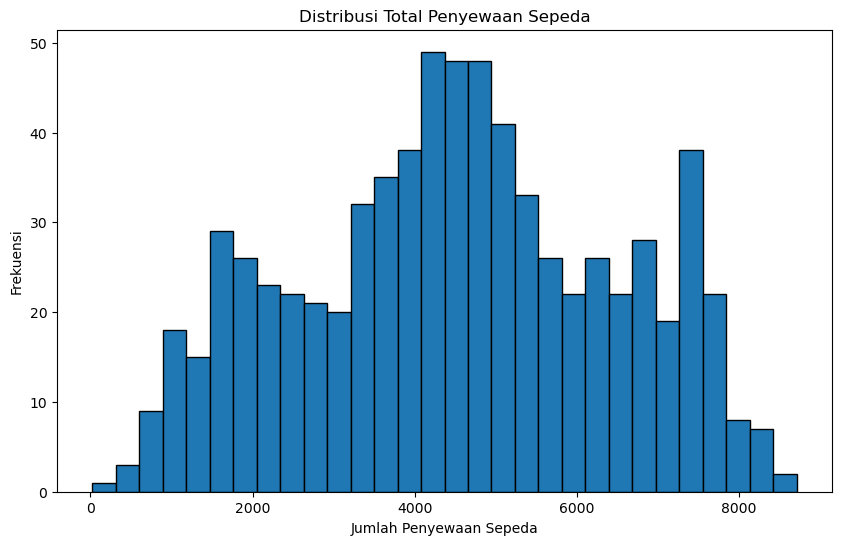

In [573]:
# Histogram untuk Total Penyewaan Sepeda
plt.figure(figsize=(10,6))
plt.hist(day_df['cnt'], bins=30, edgecolor='black')
plt.title('Distribusi Total Penyewaan Sepeda')
plt.xlabel('Jumlah Penyewaan Sepeda')
plt.ylabel('Frekuensi')
plt.show()

**Insight:**
Jumlah penyewaan sepeda (cnt) menunjukkan pola distribusi yang tidak merata, dengan mayoritas penyewaan terjadi di kisaran 3000–5000 sepeda per hari/periode. Selain itu, adanya dua puncak utama dalam distribusi bisa mengindikasikan perbedaan pola penyewaan berdasarkan faktor seperti hari kerja vs. akhir pekan atau kondisi cuaca tertentu.

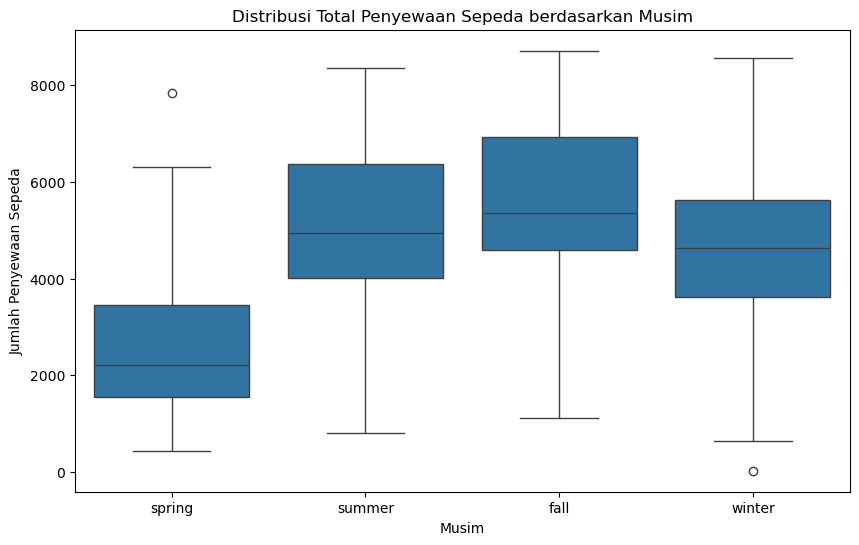

In [574]:
# Boxplot untuk Total Penyewaan Sepeda berdasarkan Musim
plt.figure(figsize=(10,6))
sns.boxplot(x='season', y='cnt', data=day_df)
plt.title('Distribusi Total Penyewaan Sepeda berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.show()

**Insight:**
Secara umum, penyewaan sepeda lebih banyak terjadi di musim panas dan gugur, sedangkan musim semi dan dingin memiliki jumlah penyewaan yang lebih rendah.

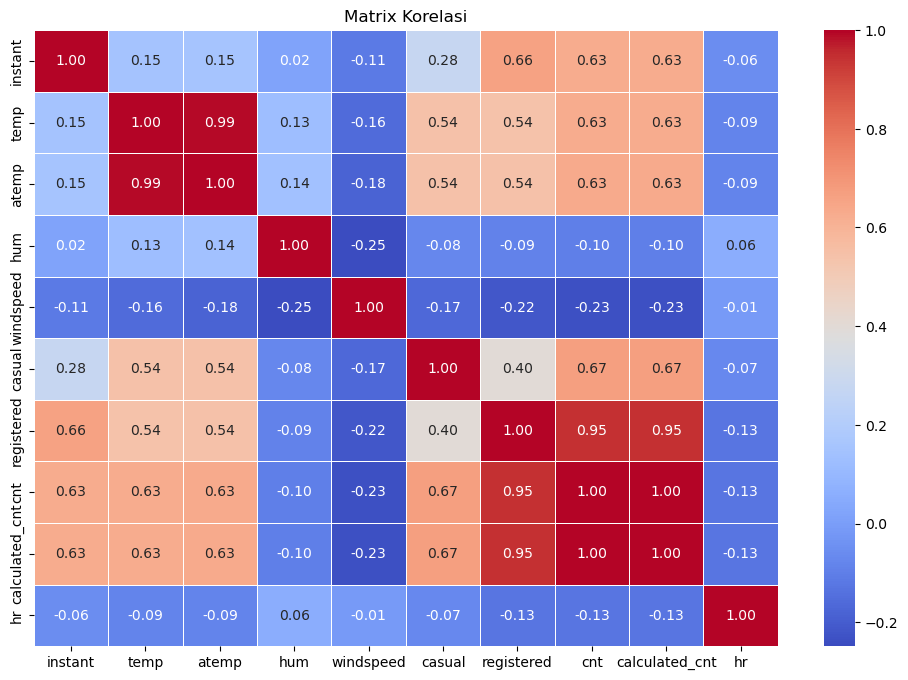

In [575]:
# Saring kolom numerik
numerical_df = day_df.select_dtypes(include=['number'])

# Matrix korelasi untuk fitur numerik
corr = numerical_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matrix Korelasi')
plt.show()

**Insight:**
- Faktor cuaca seperti suhu berpengaruh signifikan terhadap jumlah penyewaan sepeda.
- Pengguna terdaftar lebih dominan dalam penyewaan sepeda dibandingkan pengguna kasual.
- Kondisi cuaca yang buruk (kelembaban tinggi atau angin kencang) dapat sedikit mengurangi jumlah penyewaan.

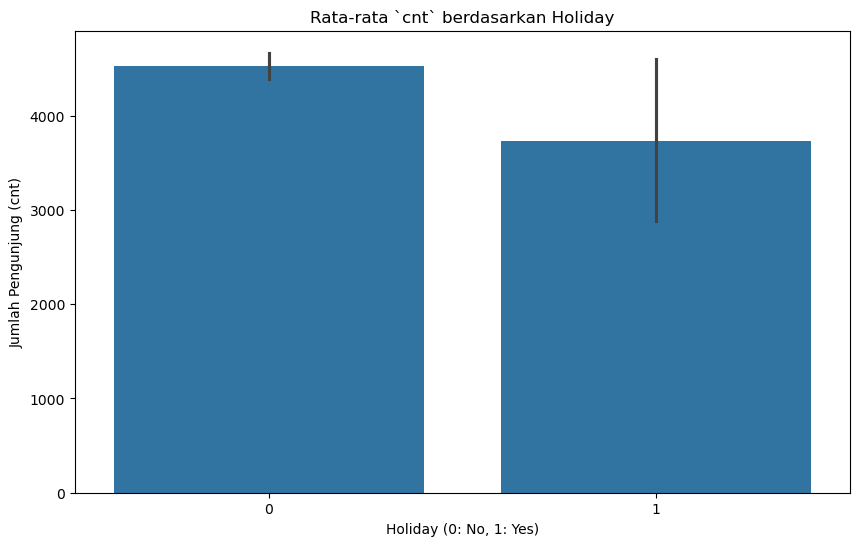

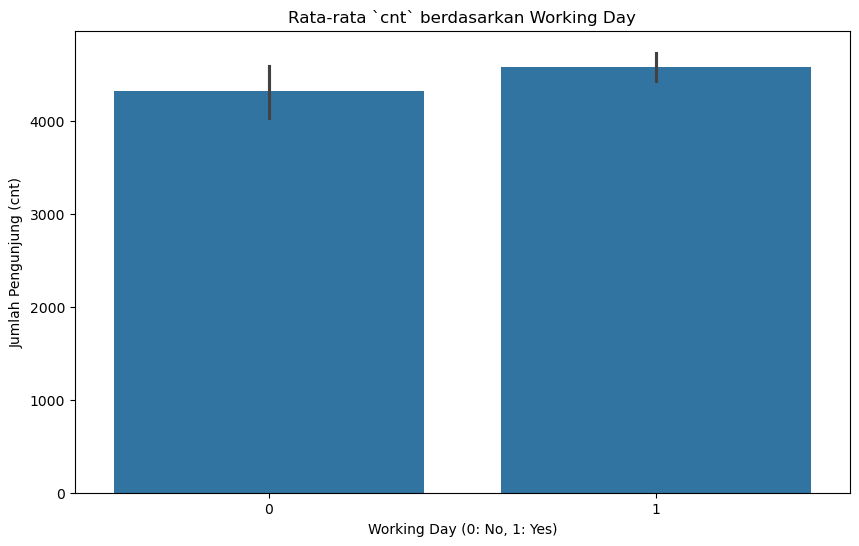

In [576]:
# Barplot untuk `cnt` berdasarkan holiday
plt.figure(figsize=(10,6))
sns.barplot(x='holiday', y='cnt', data=day_df)
plt.title('Rata-rata `cnt` berdasarkan Holiday')
plt.xlabel('Holiday (0: No, 1: Yes)')
plt.ylabel('Jumlah Pengunjung (cnt)')
plt.show()

# Barplot untuk `cnt` berdasarkan workingday
plt.figure(figsize=(10,6))
sns.barplot(x='workingday', y='cnt', data=day_df)
plt.title('Rata-rata `cnt` berdasarkan Working Day')
plt.xlabel('Working Day (0: No, 1: Yes)')
plt.ylabel('Jumlah Pengunjung (cnt)')
plt.show()

## Visualization & Explanatory Analysis

### Pertanyaan 1:

In [ ]:
Bagaimana pengaruh musim terhadap jumlah sewa sepeda (cnt)?

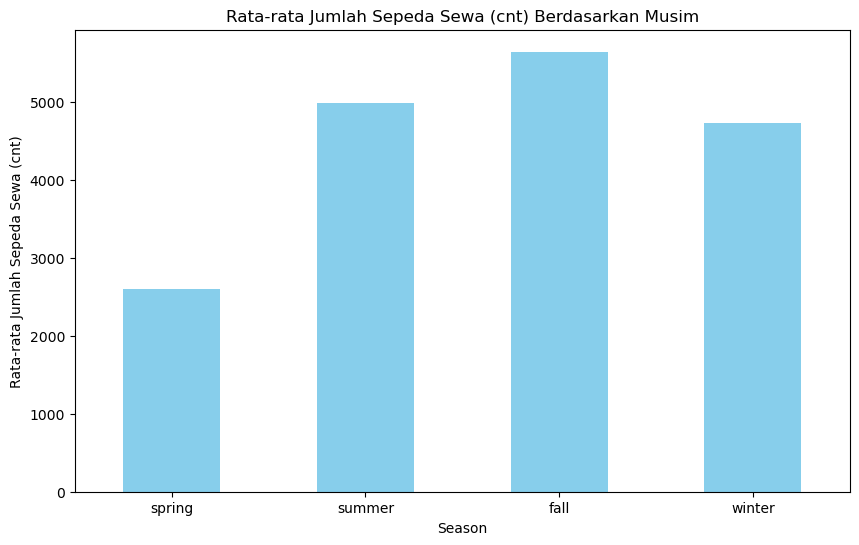

In [579]:
# Rata-rata sewa sepeda berdasarkan musim
season_avg = day_df.groupby(by="season", observed=False)["cnt"].mean()
season_avg.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Rata-rata Jumlah Sepeda Sewa (cnt) Berdasarkan Musim')
plt.xlabel('Season')
plt.ylabel('Rata-rata Jumlah Sepeda Sewa (cnt)')
plt.xticks(rotation=0)
plt.show()

**Insight:**
Terlihat bahwa jumlah sewa sepeda berbeda di setiap musim. Musim gugur (fall) memiliki jumlah penyewaan tertinggi, diikuti oleh musim panas (summer) dan musim dingin (winter), sementara musim semi (spring) memiliki jumlah penyewaan terendah. Ini menunjukkan bahwa musim memiliki pengaruh signifikan terhadap jumlah sewa sepeda, di mana musim yang lebih hangat cenderung meningkatkan jumlah penyewaan.

### Pertanyaan 2:

In [ ]:
Apakah hari libur atau hari kerja memengaruhi jumlah sewa sepeda?

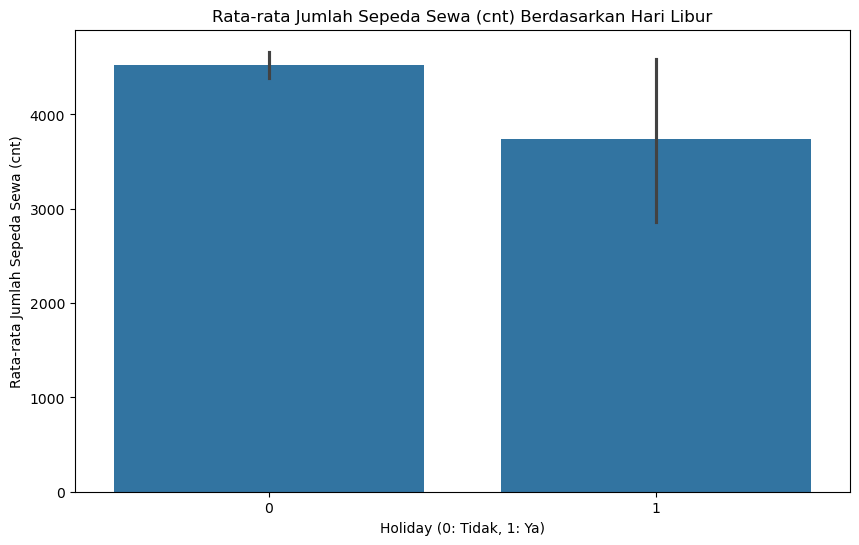

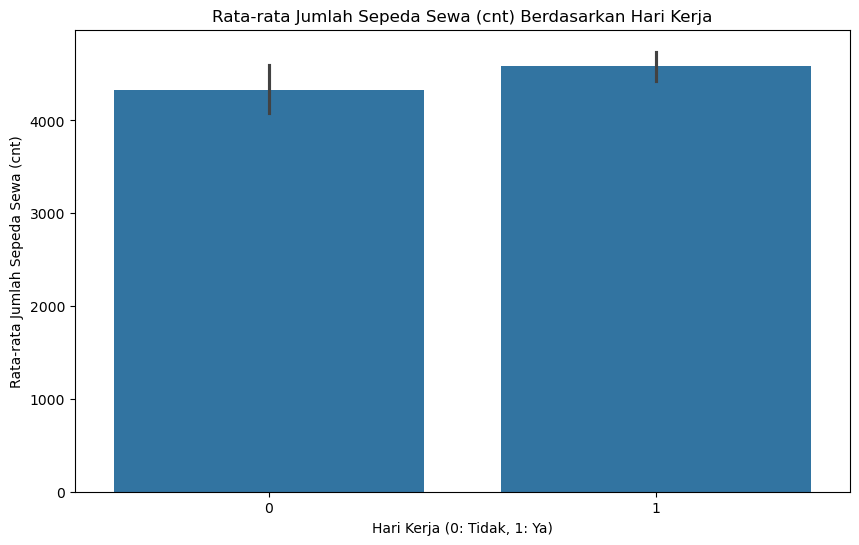

In [580]:
# Barplot untuk rata-rata jumlah sewa sepeda berdasarkan holiday
plt.figure(figsize=(10, 6))
sns.barplot(x='holiday', y='cnt', data=day_df)
plt.title('Rata-rata Jumlah Sepeda Sewa (cnt) Berdasarkan Hari Libur')
plt.xlabel('Holiday (0: Tidak, 1: Ya)')
plt.ylabel('Rata-rata Jumlah Sepeda Sewa (cnt)')
plt.show()

# Barplot untuk rata-rata jumlah sewa sepeda berdasarkan hari kerja
plt.figure(figsize=(10, 6))
sns.barplot(x='workingday', y='cnt', data=day_df)
plt.title('Rata-rata Jumlah Sepeda Sewa (cnt) Berdasarkan Hari Kerja')
plt.xlabel('Hari Kerja (0: Tidak, 1: Ya)')
plt.ylabel('Rata-rata Jumlah Sepeda Sewa (cnt)')
plt.show()

**Insight:**
- Hari kerja vs. bukan hari kerja: Tidak ada perbedaan signifikan dalam jumlah sewa sepeda antara hari kerja (1) dan bukan hari kerja (0). Artinya, jumlah sewa sepeda relatif stabil terlepas dari apakah itu hari kerja atau bukan.
  
- Hari libur vs. bukan hari libur: Terlihat bahwa jumlah sewa sepeda lebih rendah pada hari libur dibandingkan dengan hari biasa (bukan hari libur). Ini menunjukkan bahwa pada hari libur, lebih sedikit orang yang menggunakan layanan sewa sepeda, kemungkinan karena perubahan kebiasaan perjalanan (misalnya, lebih sedikit komuter yang berangkat kerja).

## Analisis Lanjutan (Opsional)

In [ ]:
Bagaimana pengaruh cuaca terhadap jumlah sewa sepeda?

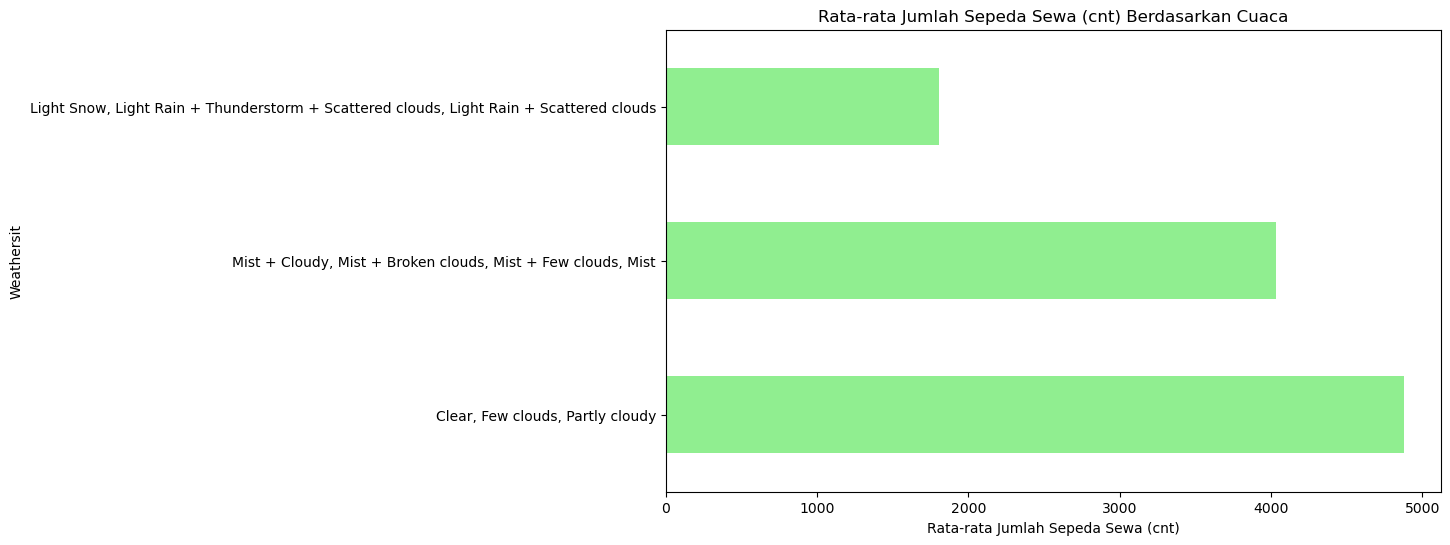

In [581]:
# Rata-rata sewa sepeda berdasarkan kondisi cuaca (menggunakan bar plot horizontal)
weather_avg = day_df.groupby(by="weathersit", observed=False)["cnt"].mean()
weather_avg.plot(kind='barh', figsize=(10, 6), color='lightgreen')
plt.title('Rata-rata Jumlah Sepeda Sewa (cnt) Berdasarkan Cuaca')
plt.xlabel('Rata-rata Jumlah Sepeda Sewa (cnt)')
plt.ylabel('Weathersit')
plt.show()

- Conclution Secara keseluruhan, semakin baik kondisi cuaca, semakin tinggi jumlah sewa sepeda. Sebaliknya, kondisi cuaca yang kurang mendukung seperti hujan atau salju menyebabkan penurunan jumlah penyewa sepeda.

## Conclusion

- Conclution pertanyaan 1

Dari hasil visualisasi untuk pertanyaan 1, terlihat bahwa jumlah sewa sepeda berbeda di setiap musim. Musim gugur (fall) memiliki jumlah penyewaan tertinggi, diikuti oleh musim panas (summer) dan musim dingin (winter), sementara musim semi (spring) memiliki jumlah penyewaan terendah. Ini menunjukkan bahwa musim memiliki pengaruh signifikan terhadap jumlah sewa sepeda, di mana musim yang lebih hangat cenderung meningkatkan jumlah penyewaan.
  
- Conclution pertanyaan 2

Hari kerja vs. bukan hari kerja: Tidak ada perbedaan signifikan dalam jumlah sewa sepeda antara hari kerja (1) dan bukan hari kerja (0). Artinya, jumlah sewa sepeda relatif stabil terlepas dari apakah itu hari kerja atau bukan.
Hari libur vs. bukan hari libur: Terlihat bahwa jumlah sewa sepeda lebih rendah pada hari libur dibandingkan dengan hari biasa (bukan hari libur). Ini menunjukkan bahwa pada hari libur, lebih sedikit orang yang menggunakan layanan sewa sepeda, kemungkinan karena perubahan kebiasaan perjalanan (misalnya, lebih sedikit komuter yang berangkat kerja).

In [585]:
day_df.to_csv("day_data.csv", index=False, encoding='utf-8')